# Importing very large CSVs into `pandas` for the CIL project 

`pandas` can handle very large files, but special flags have to be set. Let's see how this works:

In [3]:
import pandas as pd
import timeit

In [2]:
df_basic = pd.read_csv('cil_excel_object_input.csv')

/home/zelgius/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (15,16,17,23,24,25,26,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,68,80,81,84,85,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We get an interesting error. It doesn't make much sense that `pandas` is complaining about mixed data types, but perhaps that's not really the issue. It _does_ recommend we can set the flag `low_memory=False`, so let's try that. 

In [6]:
%%time
df_opt = pd.read_csv('cil_excel_object_input.csv', low_memory=False)

CPU times: user 1.68 s, sys: 96.8 ms, total: 1.78 s
Wall time: 1.8 s


It appears to have worked. Now let's look at a preview.

**NOTE:** for whatever reason, when we used our `%%time` magic, we lost whatever happened in the cell. We will first have to redo that creation of the DataFrame before we move on

In [9]:
df_opt = pd.read_csv('cil_excel_object_input.csv', low_memory=False)
df_opt[0:24]

,Object Unique ID,Level,File name,File use,Type of Resource,Type of Resource.1,Language,Title,Date:creation,Date:issued,...,Subject:topic.11,Subject:topic.12,Subject:topic.13,Subject:topic.14,Subject:topic.15,Subject:topic.16,Subject:topic.17,Subject:topic.18,Subject:topic.19,Subject:topic.20
0,12154,Object,NaN,NaN,data,still image,zxx - No linguistic content; Not applicable,"CIL:12154, Gallus gallus gallus, memory B cell.",NaN,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12154,Component,12154.jpg,image-source,NaN,NaN,NaN,Jpeg format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12154,Component,12154.tif,image-source,NaN,NaN,NaN,OME_tif format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12154,Component,12154.zip,data-service,NaN,NaN,NaN,Zip format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12154,Component,12154.json,data-service,NaN,NaN,NaN,CIL source metadata (JSON),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,35710,Object,NaN,NaN,data,still image,zxx - No linguistic content; Not applicable,"CIL:35710, Saccharomyces cerevisiae.",NaN,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,35710,Component,35710.tif,image-source,NaN,NaN,NaN,OME_tif format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,35710,Component,35710.jpg,image-source,NaN,NaN,NaN,Jpeg format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,35710,Component,35710.zip,data-service,NaN,NaN,NaN,Zip format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,35710,Component,35710.json,data-service,NaN,NaN,NaN,CIL source metadata (JSON),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Making scripts to subset the data

Now for CIL, we would like to take the huge CSV and subset it both for manageability and by copyright and licenses. Let's again import the data 

In [4]:
df_cil = pd.read_csv('../test/cil_excel_object_input.csv', low_memory=False)

In [5]:
df_cil.shape

(51327, 29)

So, the CSV has 29 columns and 51,000+ rows. Let's look at a brief snippet

In [120]:
df_cil.head()

,Object Unique ID,Level,File name,File use,Type of Resource,Language,del,Title,Date:creation,Date:issued,...,Person:researcher,Related resource:related,Subject:anatomy,Subject:scientific name,Subject:series,Subject:topic,Access granted,Copyright status,Copyright holder,CC license
0,2,Object,NaN,NaN,data | still image,zxx - No linguistic content; Not applicable,"CIL:2, Mus musculus, fibroblast.","CIL:2, Mus musculus, fibroblast",NaN,2020.0,...,"Parysek, Linda | Aebig, Trudy",Source Record in the Cell Image Library @ http...,fibroblast | mitochondrion | type III intermed...,Mus musculus,NaN,intermediate filament-based process | mitochon...,The world - metadata and files,Public Domain,NaN,NaN
1,2,Component,2.tif,image-source,NaN,NaN,OME_tif format,OME_tif format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Component,2.zip,data-service,NaN,NaN,Zip format,Zip format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Component,2.jpg,image-source,NaN,NaN,Jpeg format,Jpeg format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Component,2.json,data-service,NaN,NaN,CIL source metadata (JSON),CIL source metadata (JSON),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A first hurdle we encounter is that due to the object structure, component row values are blank/NaN for the columns we are interested in: `[Copyright status]` and `[CC license]`. We may need to fill down these values (this is done via `fillna()` in `pandas`. But it will need to be done intelligently. A 'forward fill' will always work off the _last_ valid value, which will unfortauntely fill down in objects we don't want it to.  

First, renaming these columns will help us with our operations

In [6]:
df_cil.rename({'Copyright status': 'copyright_status', 'CC license': 'cc_license'}, axis=1, inplace=True)

In [127]:
df_cil.head()

,Object Unique ID,Level,File name,File use,Type of Resource,Language,del,Title,Date:creation,Date:issued,...,Person:researcher,Related resource:related,Subject:anatomy,Subject:scientific name,Subject:series,Subject:topic,Access granted,copyright_status,Copyright holder,cc_license
0,2,Object,NaN,NaN,data | still image,zxx - No linguistic content; Not applicable,"CIL:2, Mus musculus, fibroblast.","CIL:2, Mus musculus, fibroblast",NaN,2020.0,...,"Parysek, Linda | Aebig, Trudy",Source Record in the Cell Image Library @ http...,fibroblast | mitochondrion | type III intermed...,Mus musculus,NaN,intermediate filament-based process | mitochon...,The world - metadata and files,Public Domain,NaN,NaN
1,2,Component,2.tif,image-source,NaN,NaN,OME_tif format,OME_tif format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Component,2.zip,data-service,NaN,NaN,Zip format,Zip format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Component,2.jpg,image-source,NaN,NaN,Jpeg format,Jpeg format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Component,2.json,data-service,NaN,NaN,CIL source metadata (JSON),CIL source metadata (JSON),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, to do our "intelligent" fill down for public domain objects, we will have to group by the Unique Object ID, in order to fill down object by object

In [7]:
df_cil.copyright_status = df_cil.groupby('Object Unique ID').copyright_status.apply(lambda x: x.ffill())

Let's apply a filter to just get the public domain objects and components

In [8]:
# filter rows that are public domain
cil_pd = df_cil[df_cil['copyright_status']=='Public Domain']
cil_pd

,Object Unique ID,Level,File name,File use,Type of Resource,Language,del,Title,Date:creation,Date:issued,...,Person:researcher,Related resource:related,Subject:anatomy,Subject:scientific name,Subject:series,Subject:topic,Access granted,copyright_status,Copyright holder,cc_license
0,2,Object,NaN,NaN,data | still image,zxx - No linguistic content; Not applicable,"CIL:2, Mus musculus, fibroblast.","CIL:2, Mus musculus, fibroblast",NaN,2020.0,...,"Parysek, Linda | Aebig, Trudy",Source Record in the Cell Image Library @ http...,fibroblast | mitochondrion | type III intermed...,Mus musculus,NaN,intermediate filament-based process | mitochon...,The world - metadata and files,Public Domain,NaN,NaN
1,2,Component,2.tif,image-source,NaN,NaN,OME_tif format,OME_tif format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public Domain,NaN,NaN
2,2,Component,2.zip,data-service,NaN,NaN,Zip format,Zip format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public Domain,NaN,NaN
3,2,Component,2.jpg,image-source,NaN,NaN,Jpeg format,Jpeg format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public Domain,NaN,NaN
4,2,Component,2.json,data-service,NaN,NaN,CIL source metadata (JSON),CIL source metadata (JSON),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public Domain,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51278,50660,Component,50660.json,data-service,NaN,NaN,CIL source metadata (JSON),CIL source metadata (JSON),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public Domain,NaN,NaN
51279,50661,Object,NaN,NaN,data | still image,zxx - No linguistic content; Not applicable,"CIL:50661, Homo sapiens, Umbilical vein endoth...","CIL:50661, Homo sapiens, Umbilical vein endoth...",NaN,2020.0,...,"Inala, Ashwin | Shiuan, Eileen",Source Record in the Cell Image Library @ http...,Vascular endothelial cadherin | Umbilical vein...,Homo sapiens,NaN,NaN,The world - metadata and files,Public Domain,NaN,NaN
51280,50661,Component,50661.zip,data-service,NaN,NaN,Zip format,Zip format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public Domain,NaN,NaN
51281,50661,Component,50661.jpg,image-source,NaN,NaN,Jpeg format,Jpeg format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public Domain,NaN,NaN


We see we now have a dataset of public domain objects, and it is 27,000 rows.  

Now we will need to do a similar fill down for Creative Commons licensed objects, since those components are also blank

In [9]:
df_cil.cc_license = df_cil.groupby('Object Unique ID').cc_license.apply(lambda x: x.ffill())

In [68]:
# filter out null on [CC license] to see how many CC licenses there are
df_cc = df_cil[df_cil.cc_license.notnull()]
df_cc

,Object Unique ID,Level,File name,File use,Type of Resource,Language,del,Title,Date:creation,Date:issued,...,Person:researcher,Related resource:related,Subject:anatomy,Subject:scientific name,Subject:series,Subject:topic,Access granted,copyright_status,Copyright holder,cc_license
20,123,Object,NaN,NaN,data | still image,zxx - No linguistic content; Not applicable,"CIL:123, Gallus gallus gallus, erythrocyte.","CIL:123, Gallus gallus gallus, erythrocyte",NaN,2020.0,...,"Woodcock, Christopher",Source Record in the Cell Image Library @ http...,"chromosome, telomeric region | erythrocyte",Gallus gallus gallus,NaN,structural constituent of chromatin | chromati...,The world - metadata and files,NaN,UC Regents,Attribution-NonCommercial-ShareAlike
21,123,Component,123.zip,data-service,NaN,NaN,Zip format,Zip format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution-NonCommercial-ShareAlike
22,123,Component,123.tif,image-source,NaN,NaN,OME_tif format,OME_tif format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution-NonCommercial-ShareAlike
23,123,Component,123.jpg,image-source,NaN,NaN,Jpeg format,Jpeg format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution-NonCommercial-ShareAlike
24,123,Component,123.json,data-service,NaN,NaN,CIL source metadata (JSON),CIL source metadata (JSON),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution-NonCommercial-ShareAlike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51322,50680,Component,50680.json,data-service,NaN,NaN,CIL source metadata (JSON),CIL source metadata (JSON),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution
51323,50681,Object,NaN,NaN,data | still image,zxx - No linguistic content; Not applicable,"CIL:50681, FIB-SEM Dataset of anti-PKHD1L1 Imm...","CIL:50681, FIB-SEM Dataset of anti-PKHD1L1 Imm...",NaN,2020.0,...,"Ivanchenko, Maryna | Indzhykulian, Artur | Cor...",Nature article @ https://www.nature.com/articl...,Hair cell stereocilia | Polycystic Kidney and ...,Mus musculus,Cell Image Library Group ID: 20000,Native tissue at postnatal day 4,The world - metadata and files,NaN,UC Regents,Attribution
51324,50681,Component,50681.jpg,image-source,NaN,NaN,Jpeg format,Jpeg format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution
51325,50681,Component,50681.zip,data-service,NaN,NaN,Zip format,Zip format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution


### Further filtering by CC license type
We need to not only separate public domain objects from CC licensed objects; we also need to further sort the CC licensed objects by type (attribution or CC-NY, non-derivative or CC-BY-ND, etc.).  

But first, we can look at what the distribution of the Creative Commons license types with a visualization. Although `pandas` has built in plotting via the included `matplotlib` library, we can use better-looking plots by importing the `seaborn` library

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [70]:
df_cc_grouped = df_cc.groupby(['cc_license'], sort=True)
df_cc_grouped.describe()

Object Unique ID                \
                                                count          mean   
cc_license                                                            
Attribution                                   12613.0  32527.803695   
Attribution-NoDerivs                             30.0  11526.833333   
Attribution-NonCommercial                        63.0  30177.206349   
Attribution-NonCommercial-NoDerivs             3273.0  29998.017110   
Attribution-NonCommercial-ShareAlike           7960.0  26161.180779   
Attribution-ShareAlike                          118.0  26832.245763   

                                                                               \
                                               std      min      25%      50%   
cc_license                                                                      
Attribution                            8788.372780    701.0  32532.0  33662.0   
Attribution-NoDerivs                     11.632545  11502.0  11528.0  11530.5   
Attribution-NonCommercial              8364.176415  10410.0  30563.0  30567.0   
Attribution-NonCommercial-NoDerivs    13258.753812  10763.0  11417.0  38817.0   
Attribution-NonCommercial-ShareAlike  12231.803846    123.0  13479.0  26552.5   
Attribution-ShareAlike                 4428.517172  13524.0  26588.0  26593.5   

                                                        Date:issued          \
                                           75%      max       count    mean   
cc_license                                                                    
Attribution                           35889.00  50681.0      2365.0  2020.0   
Attribution-NoDerivs                  11534.00  11536.0         6.0  2020.0   
Attribution-NonCommercial             37288.00  41473.0        13.0  2020.0   
Attribution-NonCommercial-NoDerivs    39086.00  44153.0       616.0  2020.0   
Attribution-NonCommercial-ShareAlike  37252.25  50665.0      1607.0  2020.0   
Attribution-ShareAlike                26599.00  46706.0        24.0  2020.0   

                                      ...                  \
                                      ...     75%     max   
cc_license                            ...                   
Attribution                           ...  2020.0  2020.0   
Attribution-NoDerivs                  ...  2020.0  2020.0   
Attribution-NonCommercial             ...  2020.0  2020.0   
Attribution-NonCommercial-NoDerivs    ...  2020.0  2020.0   
Attribution-NonCommercial-ShareAlike  ...  2020.0  2020.0   
Attribution-ShareAlike                ...  2020.0  2020.0   

                                     Identifier:samplenumber                \
                                                       count          mean   
cc_license                                                                   
Attribution                                           2365.0  32698.170402   
Attribution-NoDerivs                                     6.0  11526.833333   
Attribution-NonCommercial                               13.0  30094.769231   
Attribution-NonCommercial-NoDerivs                     616.0  29422.431818   
Attribution-NonCommercial-ShareAlike                  1607.0  26382.771002   
Attribution-ShareAlike                                  24.0  26886.958333   

                                                                       \
                                               std      min       25%   
cc_license                                                              
Attribution                            9159.916351    701.0  32542.00   
Attribution-NoDerivs                     12.528634  11502.0  11528.25   
Attribution-NonCommercial              8890.070802  10410.0  30563.00   
Attribution-NonCommercial-NoDerivs    13468.832021  10763.0  11386.50   
Attribution-NonCommercial-ShareAlike  12339.112343    123.0  13547.50   
Attribution-ShareAlike                 4992.422715  13524.0  26587.75   

                                            

In [72]:
cc_counts = df_cc.groupby('cc_license').count().reset_index()
cc_counts

,cc_license,Object Unique ID,Level,File name,File use,Type of Resource,Language,del,Title,Date:creation,...,Note:technical details,Person:researcher,Related resource:related,Subject:anatomy,Subject:scientific name,Subject:series,Subject:topic,Access granted,copyright_status,Copyright holder
0,Attribution,12613,12613,10248,10248,2365,2365,12613,12613,4,...,2363,2344,2365,2349,2365,2289,2221,2365,0,2365
1,Attribution-NoDerivs,30,30,24,24,6,6,30,30,0,...,6,6,6,6,6,6,6,6,0,6
2,Attribution-NonCommercial,63,63,50,50,13,13,63,63,3,...,13,13,13,13,13,12,10,13,0,13
3,Attribution-NonCommercial-NoDerivs,3273,3273,2657,2657,616,616,3273,3273,0,...,616,602,616,608,531,341,573,616,0,616
4,Attribution-NonCommercial-ShareAlike,7960,7960,6353,6353,1607,1607,7960,7960,114,...,1605,1596,1599,1596,1426,1467,1433,1607,0,1607
5,Attribution-ShareAlike,118,118,94,94,24,24,118,118,0,...,24,24,24,24,24,23,24,24,0,24


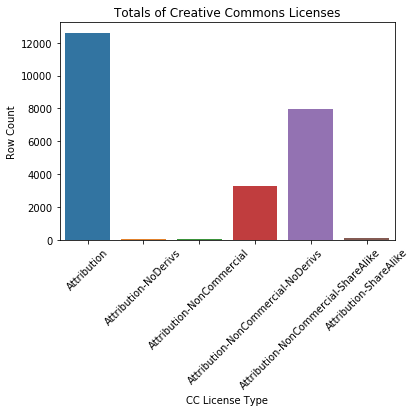

In [73]:
sns.barplot(x = 'cc_license', y = 'Object Unique ID', data=cc_counts)
plt.xlabel('CC License Type')
plt.xticks(rotation = 45)
plt.ylabel('Row Count')
plt.title('Totals of Creative Commons Licenses')
plt.show()

Now, we can pass simple filters based on values to get the isolated data we want based on the value of `[cc_license]`

In [14]:
cc_by = df_cc[df_cc['cc_license']=='Attribution']
cc_by

,Object Unique ID,Level,File name,File use,Type of Resource,Language,del,Title,Date:creation,Date:issued,...,Person:researcher,Related resource:related,Subject:anatomy,Subject:scientific name,Subject:series,Subject:topic,Access granted,copyright_status,Copyright holder,cc_license
634,701,Object,NaN,NaN,data | still image,zxx - No linguistic content; Not applicable,"CIL:701, Rattus, multipolar neuron.","CIL:701, Rattus, multipolar neuron",NaN,2020.0,...,"Withers, Ginger",Source Record in the Cell Image Library @ http...,dendritic branch | dendrite | axon | multipola...,Rattus,NaN,dendrite development | establishment or mainte...,The world - metadata and files,NaN,UC Regents,Attribution
635,701,Component,701.zip,data-service,NaN,NaN,Zip format,Zip format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution
636,701,Component,701.tif,image-source,NaN,NaN,OME_tif format,OME_tif format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution
637,701,Component,701.jpg,image-source,NaN,NaN,Jpeg format,Jpeg format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution
638,701,Component,701.json,data-service,NaN,NaN,CIL source metadata (JSON),CIL source metadata (JSON),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51322,50680,Component,50680.json,data-service,NaN,NaN,CIL source metadata (JSON),CIL source metadata (JSON),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution
51323,50681,Object,NaN,NaN,data | still image,zxx - No linguistic content; Not applicable,"CIL:50681, FIB-SEM Dataset of anti-PKHD1L1 Imm...","CIL:50681, FIB-SEM Dataset of anti-PKHD1L1 Imm...",NaN,2020.0,...,"Ivanchenko, Maryna | Indzhykulian, Artur | Cor...",Nature article @ https://www.nature.com/articl...,Hair cell stereocilia | Polycystic Kidney and ...,Mus musculus,Cell Image Library Group ID: 20000,Native tissue at postnatal day 4,The world - metadata and files,NaN,UC Regents,Attribution
51324,50681,Component,50681.jpg,image-source,NaN,NaN,Jpeg format,Jpeg format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution
51325,50681,Component,50681.zip,data-service,NaN,NaN,Zip format,Zip format,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attribution


We can then do the same for the rest of the CC license values